# Filtro pasivo pasa-bajos (7)

In [1]:
#Inicializamos pylab y configuramos
%pylab inline
rc('text', usetex=True) #LaTeX
rc('font', family='serif', weight='normal', size=16) 
rcParams['figure.figsize'] = (10.0, 9.0) #Tamaño de las gráficas

Populating the interactive namespace from numpy and matplotlib


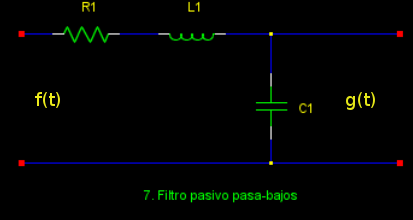

In [2]:
from IPython.display import Image
I = Image(filename="filtro7.png")
I


### 1.- Calcular la función de transferencia
Resolvemos el circuito por fasores:

$$f( \omega ) = V_R( \omega ) + V_c( \omega ) + V_L ( \omega )$$


$$V_R = I(  \omega ) \cdot R$$
$$V_L = I(  \omega ) \cdot j \omega L$$
$$G( \omega ) = V_C = I(  \omega ) \cdot \frac{1}{j \omega C}$$

Sustituyendo:

$$I( \omega ) = \frac{f( \omega )}{R + j \omega L + \frac{1}{j \omega C}}$$

La salida queda:

$$G( \omega ) = \frac{1}{j \omega C} \frac{F( \omega )}{R + j \omega L + \frac{1}{j \omega C}} = \frac{F( \omega )}{jR \omega C - \omega ^ 2 LC +1} $$

La función de transferencia:

$$ H( \omega ) = \frac{1}{jR \omega C - \omega ^ 2 LC +1} $$

####A continuación la representaremos para unas frecuencias:

In [6]:
w = linspace(0, 5000, 1000)
wlog = numpy.logspace(0,4,1000)

def filtroPasivoPasaBajos(w, R, L, C):
    u"""Filtro nº 7"""
    H = 1 / ((R * 1j * w * C) - ((w ** 2) * C * L) + 1)
    hi = ifft(H * len(w))
    return(H,hi)
    
R,L,C = 15000, 5e-3, 1e-7 #Datos ejemplo

H, hi = filtroPasivoPasaBajos(w,R,L,C)
Hlog, hilog = filtroPasivoPasaBajos(wlog,R,L,C)

#Calculo de la frecuencia de corte

fcorind= argmin(abs((abs(H[:500])**2)-0.5))

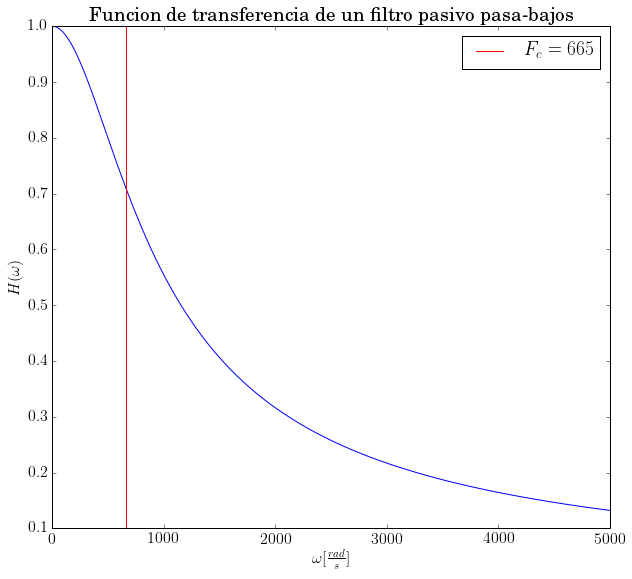

In [19]:
plot(w,abs(H))
fcor = w[fcorind]
axvline(fcor, 0,1, c = "r", label="$F_c = {}$".format(int(fcor)))


legend(loc="best")
ylabel(r"$H ( \omega )$")
xlabel(r"$\omega [\frac{rad}{s}]$")
title("Funcion de transferencia de un filtro pasivo pasa-bajos")
show()


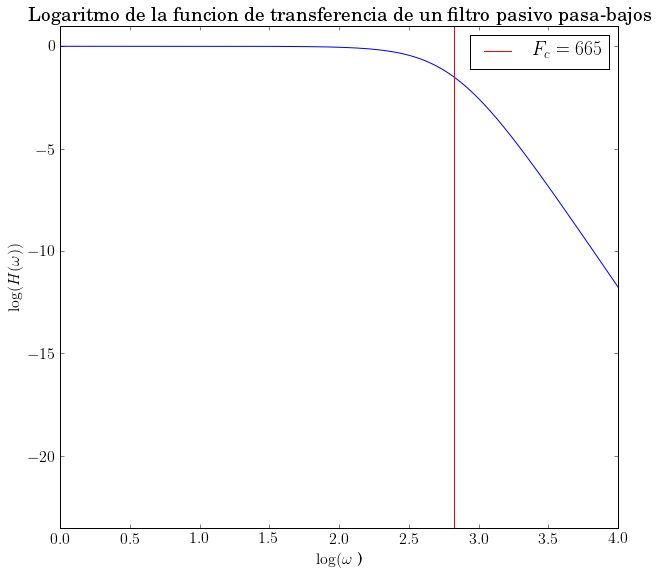

In [18]:
ylim(ymax=1, ymin = min(10*log10(abs(Hlog)**2)))

plot(log10(wlog),10*log10(abs(Hlog)))
axvline(log10(fcor), 0, 1, c = "r", label="$F_c = {}$".format(int(fcor)))
ylabel(r"$\log (H ( \omega ))$")
xlabel(r"$\log( \omega$ )")
legend(loc="best")
title("Logaritmo de la funcion de transferencia de un filtro pasivo pasa-bajos")
show()

### 2.- Obtener mediante transformada de Fourier inversa la respuesta impulsiva


La respuesta impulsiva es la transformada de Fourier inversa de la función de transferencia:

$$ h(t) = \int_{-\infty}^\infty e^{iwx} \cdot H( \omega ) \mathrm{d}x $$

Escribimos H como suma de fracciones simples:

$$ H(w) = \frac{1}{(\omega - \omega _1 ) (\omega - \omega _2 )} = \frac{1}{\omega _1 - \omega _2 } \left[\frac{1}{\omega - \omega _1} - \frac{1}{\omega - \omega _2} \right]$$

Con:

$$\omega _1 = j \alpha + \sqrt{\omega _0 ^2 - \alpha ^2} $$
$$\omega _2 = j \alpha - \sqrt{\omega _0 ^2 - \alpha ^2} $$
$$\alpha = \frac{R}{2L} $$
$$\omega _0 ^2 = \frac{1}{LC} $$

La respuesta impulsiva queda:

$$ h(t) = \int_{-\infty}^\infty e^{iwx} \cdot \frac{1}{\omega _1 - \omega _2 } \left[\frac{1}{\omega - \omega _1} - \frac{1}{\omega - \omega _2} \right] \mathrm{d}x $$

Utilizando las tablas:

$$ \int_{-\infty}^\infty \frac{e^{ipx}}{x - a} = j \pi e^{jap}$$

$$ h(t) = \frac{j \pi}{\sqrt{2 \pi}} \frac{1}{\omega _2 - \omega _1} \left( e^{i\omega _1 t} - e^{i\omega _2 t}\right)  $$

Sustituyendo, usando la relación de Euler para el seno y simplificando, queda finalmente:

$$ h(t) = -\sqrt{\frac{\pi}{2(\omega _0 ^2 -\alpha ^2)}} e^{-\alpha t} \sin{[(w_0^2 - \alpha^2)t]}
= -\sqrt{\frac{\pi}{2\left[\frac{1}{LC} - \left(\frac{R}{2L}\right)^2\right]}}e^{-\frac{R}{2L} t} \sin{\left[\left(\frac{1}{LC} - \left(\frac{R}{2L}\right)^2\right)t\right]}$$

###3.- Desarrollar el código en python para añadirlo a la clase LTI_System del filtro.

Se debe de añadir el siguiente método a la clase LTI_System:

In [50]:
    def filtroPasivoPasaBajos(self, R, L, C):
        u"""Filtro nº 7"""
        w = 2 * pyl.pi * self.frec
        self.H = 1 / ((R * 1j * w * C) - ((w ** 2) * C * L) + 1)
        self.h = pyl.ifft(self.H * self.N)
        return(None)

###4.- Ejecutar en python la simulación de un pulso pasando por el filtro
####4.1- Creamos el pulso

In [11]:
import simdaq as s

sig1=s.Signal(t1=-5,t2=5,fm=8000)
sig1.pulse(pos=0,wid=1)

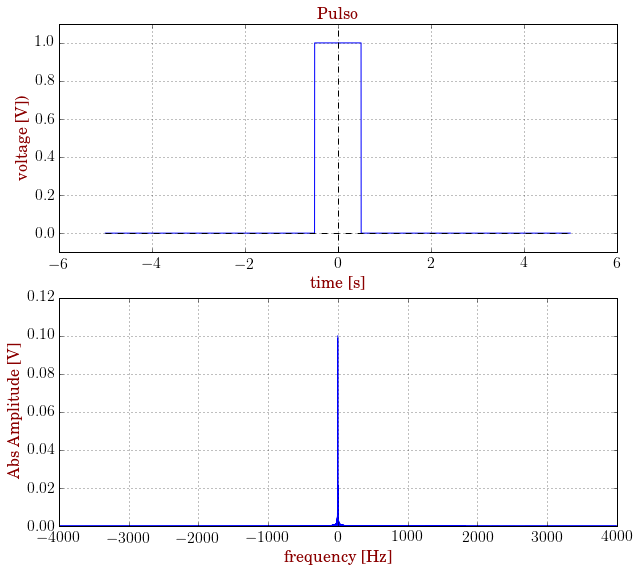

In [20]:
sig1.pinta(titulo="Pulso")

####4.2- Creamos el sistema

In [13]:
sis = s.LTI_System(T=10,fm=8000)
sis.filtroPasivoPasaBajos(R,L,C)
sig2 = sis(sig1)

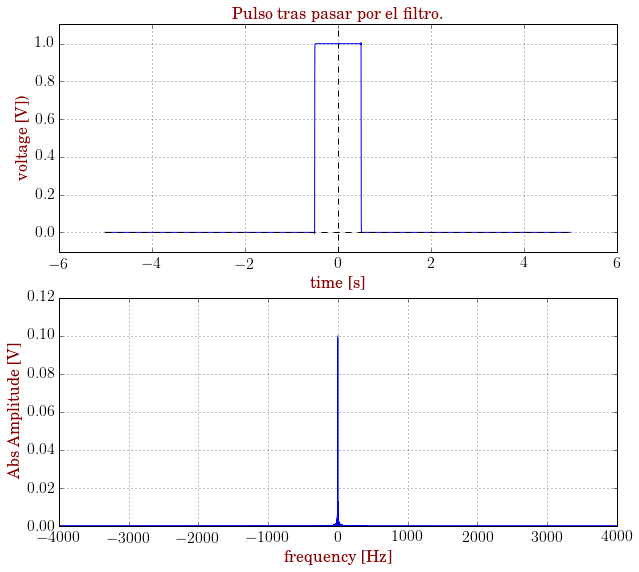

In [21]:
sig2.pinta(titulo="Pulso tras pasar por el filtro.")

No se aprecia deformación, sin embargo, si hacemos zoom en esa zona: 

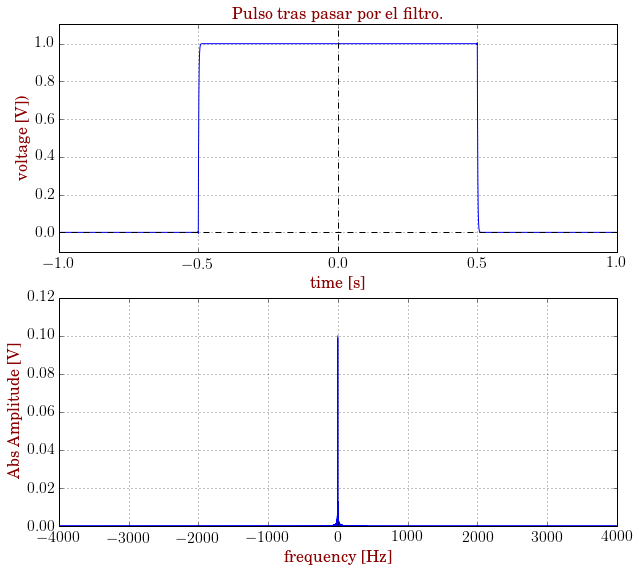

In [22]:
sig2.pinta(titulo="Pulso tras pasar por el filtro.", xlim=(-1,1))

En mi simadq.py modifiqué el metodo pinta de la clase Signal para añadirle los parámetros xlim, ylim, fxlim y fylim. Puede consultarlo aquí: https://github.com/RoberTnf/Se-ales/blob/master/simdaq.py 


También tiene el trabajo aquí: https://github.com/RoberTnf/Se-ales/blob/master/Filtro%20pasivo%20pasa-bajos.ipynb

Si desea que elimine el archivo simdaq.py, por favor envíeme un correo.